######## FINAL ########
Accuracy: 1.0
Weights: [-0.36703259  0.44633114]
Bias: 0.6090360388227029


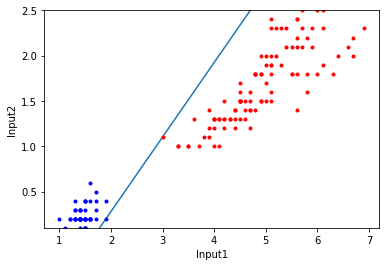

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris = load_iris()
X = iris.data[:, (2, 3)]  # use only petal length and petal width
y = (iris.target == 0).astype(np.int) # check only if it's an Iris-Setosa (1), or no (0)

class Perceptron():
    
    def __init__(self, inputs, learning_rate = 0.001, epochs_to_train = 10000):
        self.inputs = inputs
        self.bias = (2 * np.random.random()) - 1
        self.weights = (2 * np.random.rand(inputs)) - 1
        self.learning_rate = learning_rate
        self.epochs_to_train = epochs_to_train
        
        
    def predict(self, data):
        activation = self.bias
        activation += self.weights.dot(data)
        return self.binary_activation_function(activation)
    
    
    def binary_activation_function(self, activation_value):
        return 1 if activation_value >= 0 else 0
    
    
    def train(self, training_data, labels, verbose = False):
        for epoch in range(self.epochs_to_train):
            correct_predictions = 0
            for data_point, label in zip(training_data, labels):
                prediction = self.predict(data_point)
                if prediction == label:
                    correct_predictions += 1
                else:
                    self.bias -= self.learning_rate * (prediction - label)
                    for i in range(len(self.weights)):
                        self.weights[i] -= self.learning_rate * (prediction - label) * data_point[i]
            if verbose and epoch % 10 == 0:
                print('######## EPOCH ' + str(epoch) + ' ########')
                print('Accuracy: ' + str(correct_predictions / len(training_data)))
                print('Weights: ' + str(self.weights))
                print('Bias: ' + str(self.bias))
                
        print('######## FINAL ########')
        print('Accuracy: ' + str(correct_predictions / len(training_data)))
        print('Weights: ' + str(self.weights))
        print('Bias: ' + str(self.bias))
                
    
    
perceptron = Perceptron(2, epochs_to_train=500)
perceptron.train(X[:-50], y[:-50])

min_value = X[:,0].min()
max_value = X[:,0].max()
slope = -(perceptron.weights[0]/perceptron.weights[1])
offset = -perceptron.bias/perceptron.weights[1]
plt.plot([min_value, max_value], [slope*min_value + offset, slope*max_value + offset])

IrisSetosaIndexes = [i for i in range(len(y)) if y[i] == 1]
OthersIndexes = [i for i in range(len(y)) if y[i] == 0]
plt.plot(X[:,0][IrisSetosaIndexes] , X[:,1][IrisSetosaIndexes], 'b.')
plt.plot(X[:,0][OthersIndexes] , X[:,1][OthersIndexes], 'r.')
plt.xlabel('Input1')
plt.ylabel('Input2')
plt.ylim(X[:,1].min(), X[:,1].max())
plt.show()

In [24]:
perceptron.predict([1.6,0])

1